### Problem Statement Concrete Strength Prediction

**Objective:** 
--
Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.


In [1]:
# importing libraries
import pandas as pd ## data preprocessing
import matplotlib.pyplot as plt ## data visualisation
import numpy as np # mathematical calculation
import seaborn as sns ## data visualisation 

In [2]:
dataset = pd.read_excel("Concrete.xls")

In [3]:
dataset.shape

(1030, 9)

In [4]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
########### Dublicates values 
for feature in dataset.columns:
    
    print(f"{feature} ---- {dataset.duplicated(feature).sum()}") 

Cement (component 1)(kg in a m^3 mixture) ---- 750
Blast Furnace Slag (component 2)(kg in a m^3 mixture) ---- 843
Fly Ash (component 3)(kg in a m^3 mixture) ---- 867
Water  (component 4)(kg in a m^3 mixture) ---- 825
Superplasticizer (component 5)(kg in a m^3 mixture) ---- 875
Coarse Aggregate  (component 6)(kg in a m^3 mixture) ---- 746
Fine Aggregate (component 7)(kg in a m^3 mixture) ---- 726
Age (day) ---- 1016
Concrete compressive strength(MPa, megapascals)  ---- 92


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
   * continious
   * descrete
6. Outliers
7. Relationship between independent and dependent feature(concrete_strength)


In [6]:
## Here we will check the missing values in our dataset
dataset.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
dataset.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


 **there are no missing values so we dont have to worry about missing values**

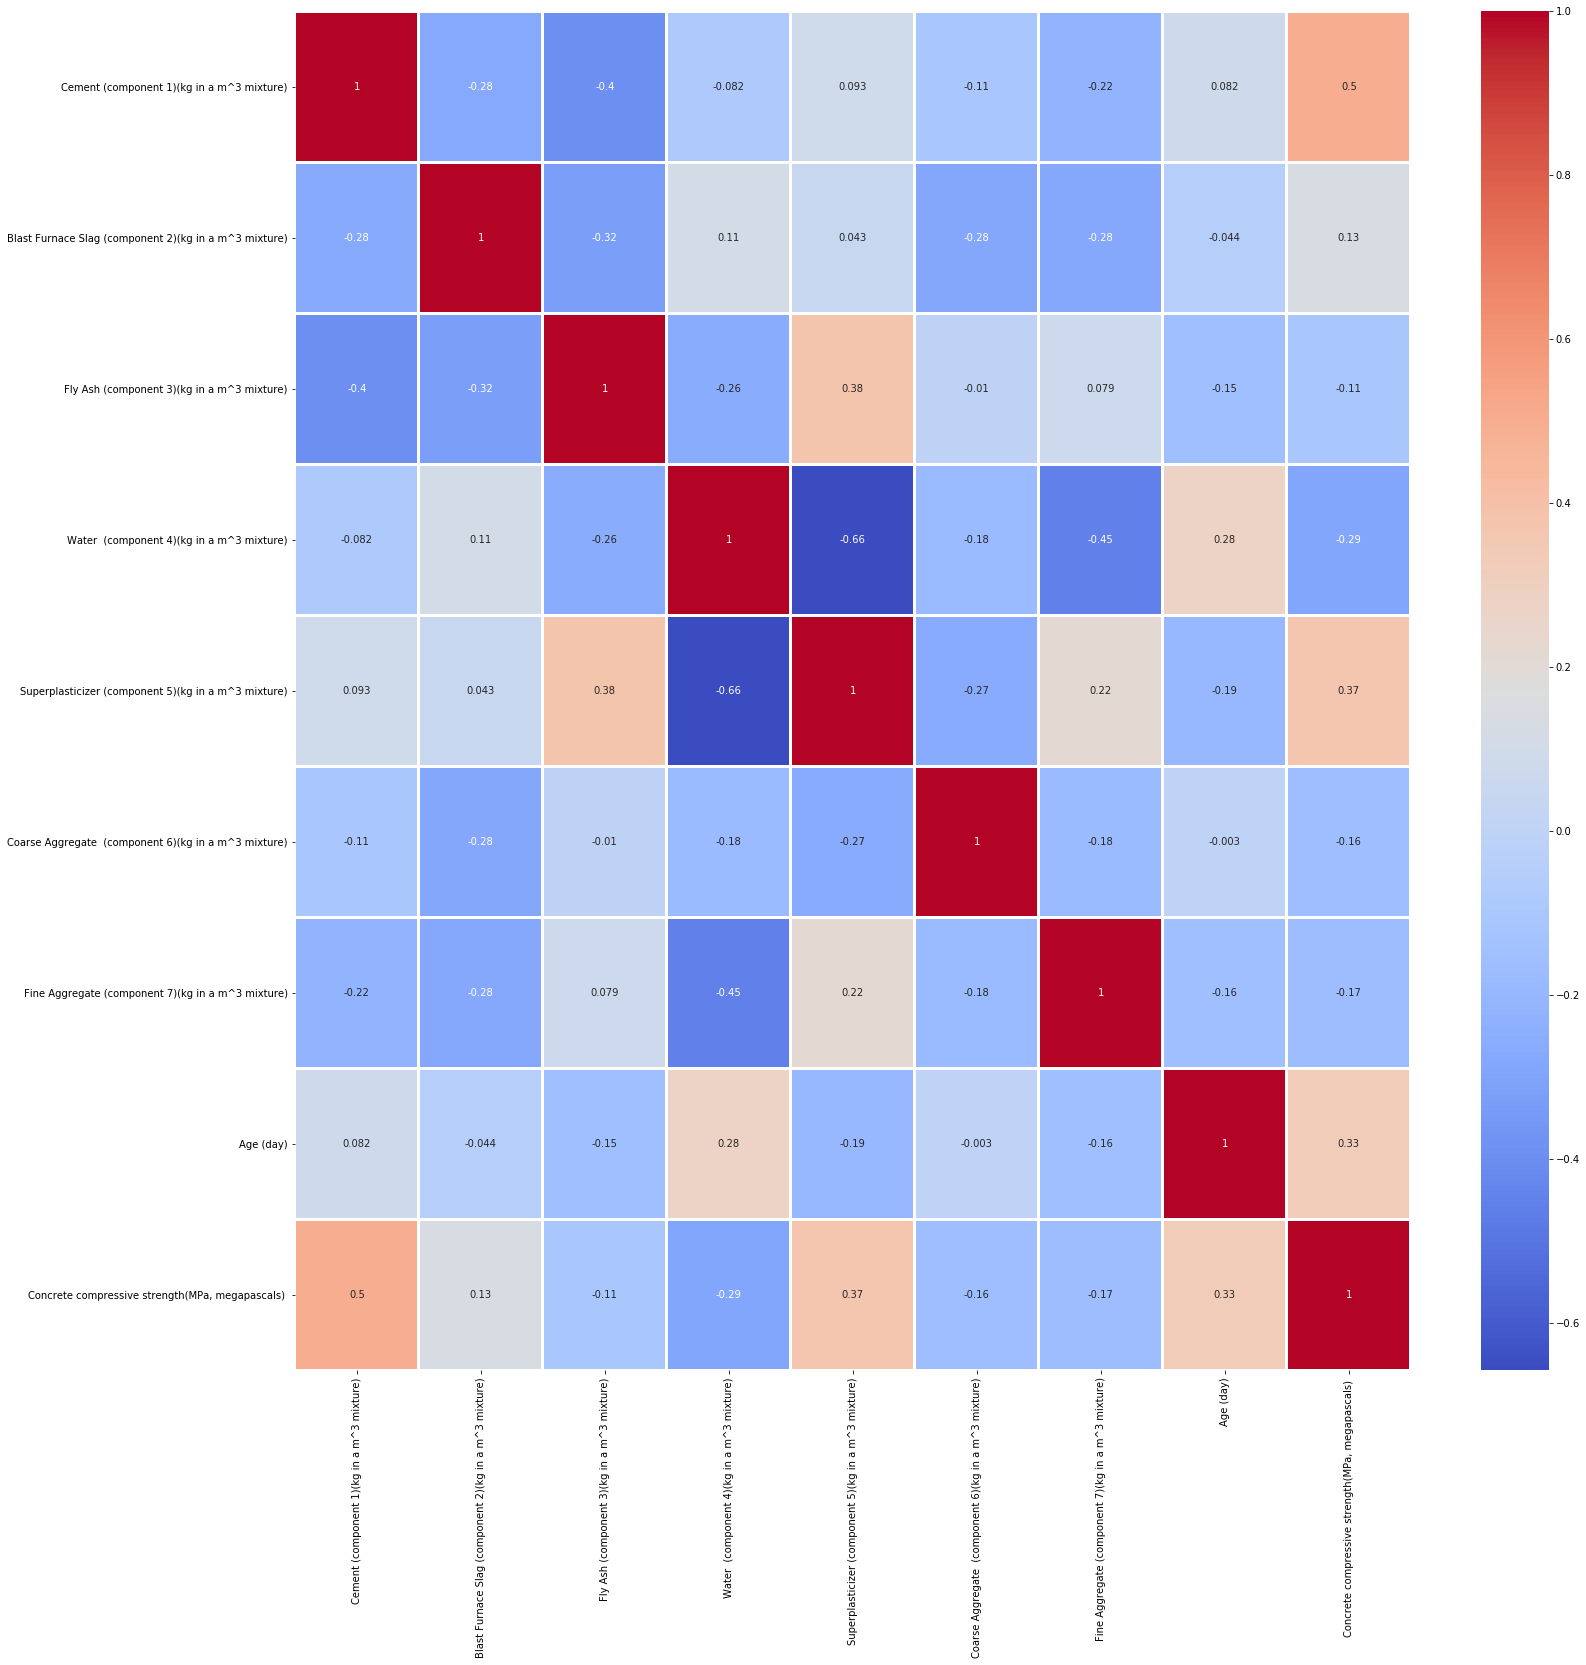

In [8]:
## lets check the correlation of variables with each other 
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(dataset.corr(), cmap = "coolwarm", annot=True, linewidth=2)

* **all the variables have less than 60% correlattion with each other so we can't drop any variable**
* **all the variables have more than 11% coreelation with output variable so we can't drop any of them**

In [9]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())<15]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [10]:
discrete_feature

['Age (day)']

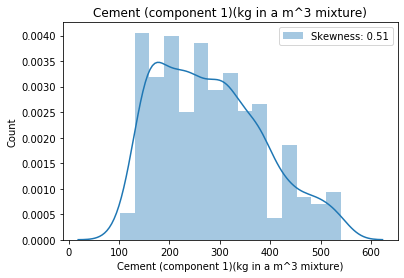

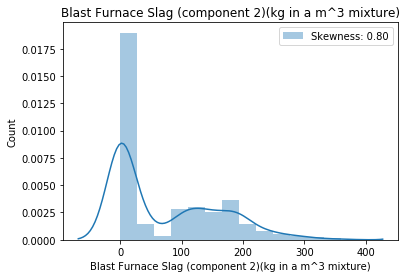

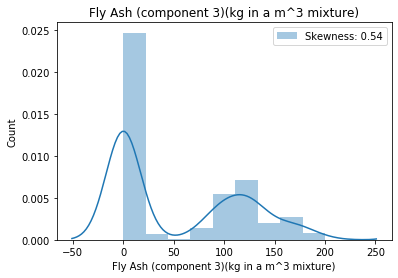

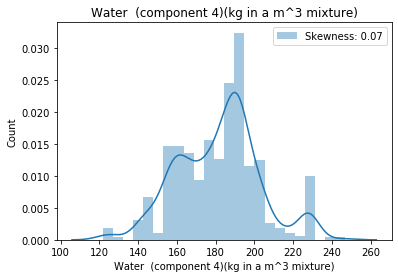

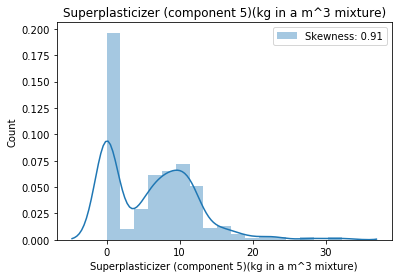

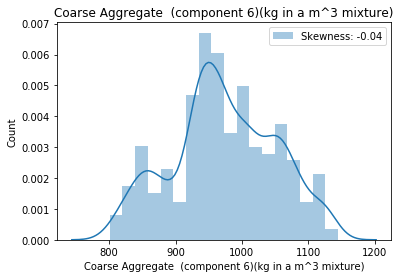

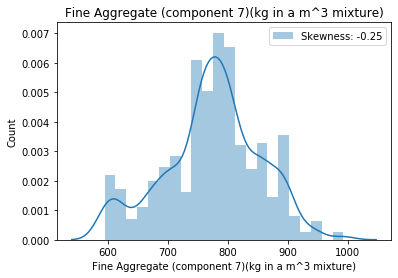

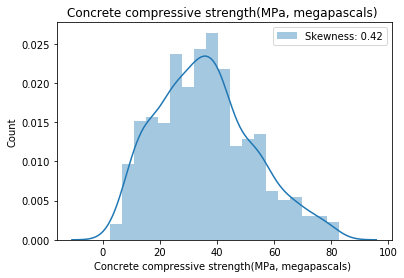

In [11]:
for feature in dataset.columns:
    if feature == "Age (day)":
        pass   
    else:
        
        data=dataset.copy()
        # data[feature].hist(bins=25) # we can also use histogram for checking the distribution of data 
        bar = sns.distplot(data[feature])
        bar.legend(["Skewness: {:.2f}".format(data[feature].skew())])
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()


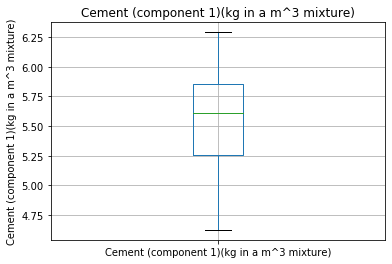

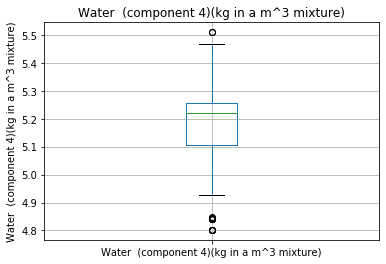

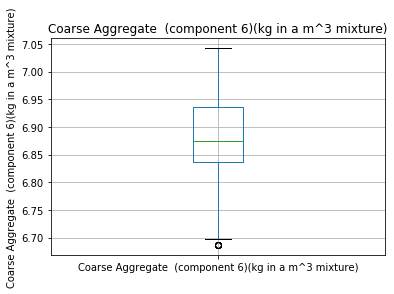

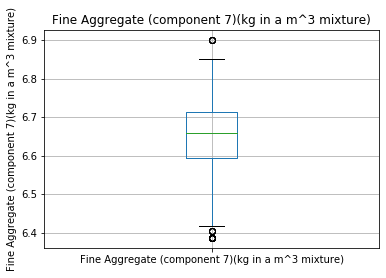

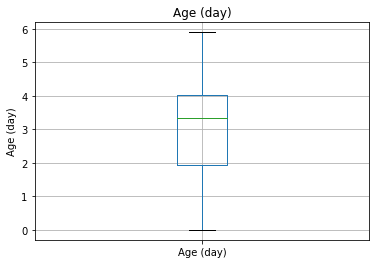

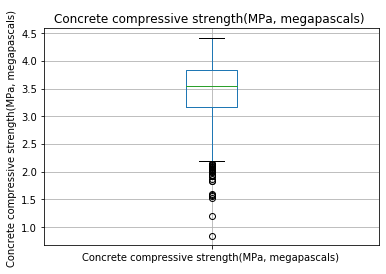

In [12]:
# we don't have missing values in our dataset so we can skip if condition 
for feature in dataset.columns:
    data=dataset.copy()
    if 0 in data[feature].unique():# because log 0 is not defined thats why we are using this condition or we can also use log1p
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
           

In [13]:
import scipy.stats as stat
import pylab 

### Transformation
1. Normalization And Standardization
2. MinMaxscaler
3. Guassian Transformation Logarithmic Transformation Reciprocal Trnasformation Square Root Transformation Exponential Trnasformation Box Cox Transformation

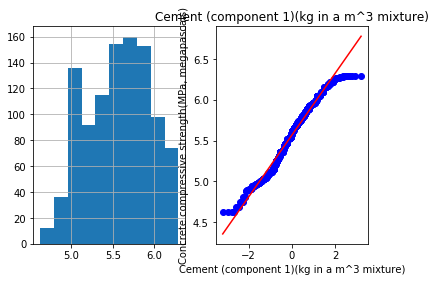

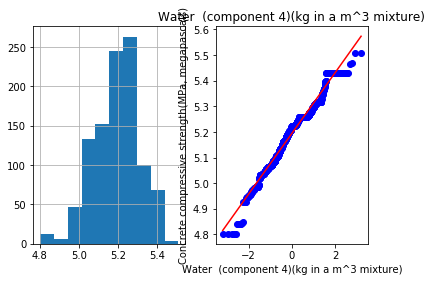

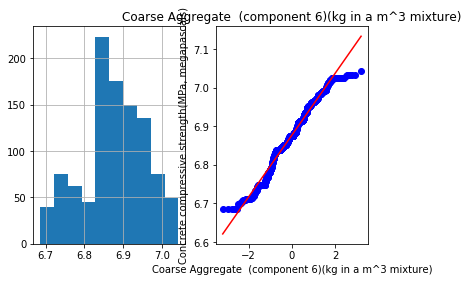

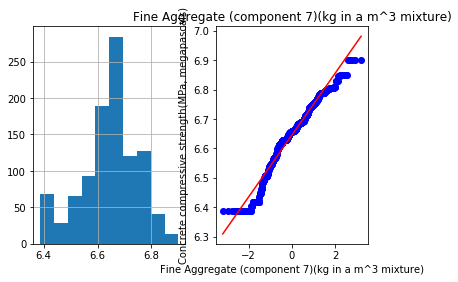

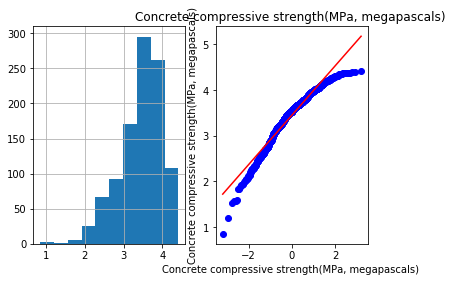

In [14]:
## We will be using logarithmic transformation
for feature in dataset.columns:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    elif feature== "Age (day)":
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.subplot(1,2,1)
        data[feature].hist()
        plt.subplot(1,2,2)
        stat.probplot(data[feature],dist='norm',plot=pylab)
        plt.xlabel(feature)
        plt.ylabel('Concrete compressive strength(MPa, megapascals)')
        plt.title(feature)
        plt.show()

## Feature engineering

In [15]:
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [16]:
for feature in dataset.columns:
    if feature == "Water (component 4)(kg in a m^3 mixture)":
        pass
    if feature== "Age (day)":
        pass
    elif feature == "Coarse Aggregate (component 6)(kg in a m^3 mixture)":
        pass
    elif feature == "Fine Aggregate (component 7)(kg in a m^3 mixture)":
        pass
    #elif 0 in dataset[feature].unique():
        #pass

    else:
        dataset[feature]=np.log1p(dataset[feature])   

In [17]:
# removing outliers
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cement (component 1)(kg in a m^3 mixture)                 0.596161
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     4.969466
Fly Ash (component 3)(kg in a m^3 mixture)                4.781390
Water  (component 4)(kg in a m^3 mixture)                 0.151305
Superplasticizer (component 5)(kg in a m^3 mixture)       2.412336
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.099297
Fine Aggregate (component 7)(kg in a m^3 mixture)        93.050000
Age (day)                                                49.000000
Concrete compressive strength(MPa, megapascals)           0.645949
dtype: float64


In [18]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(928, 9)

## Data visualisation

C:\Users\premb\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


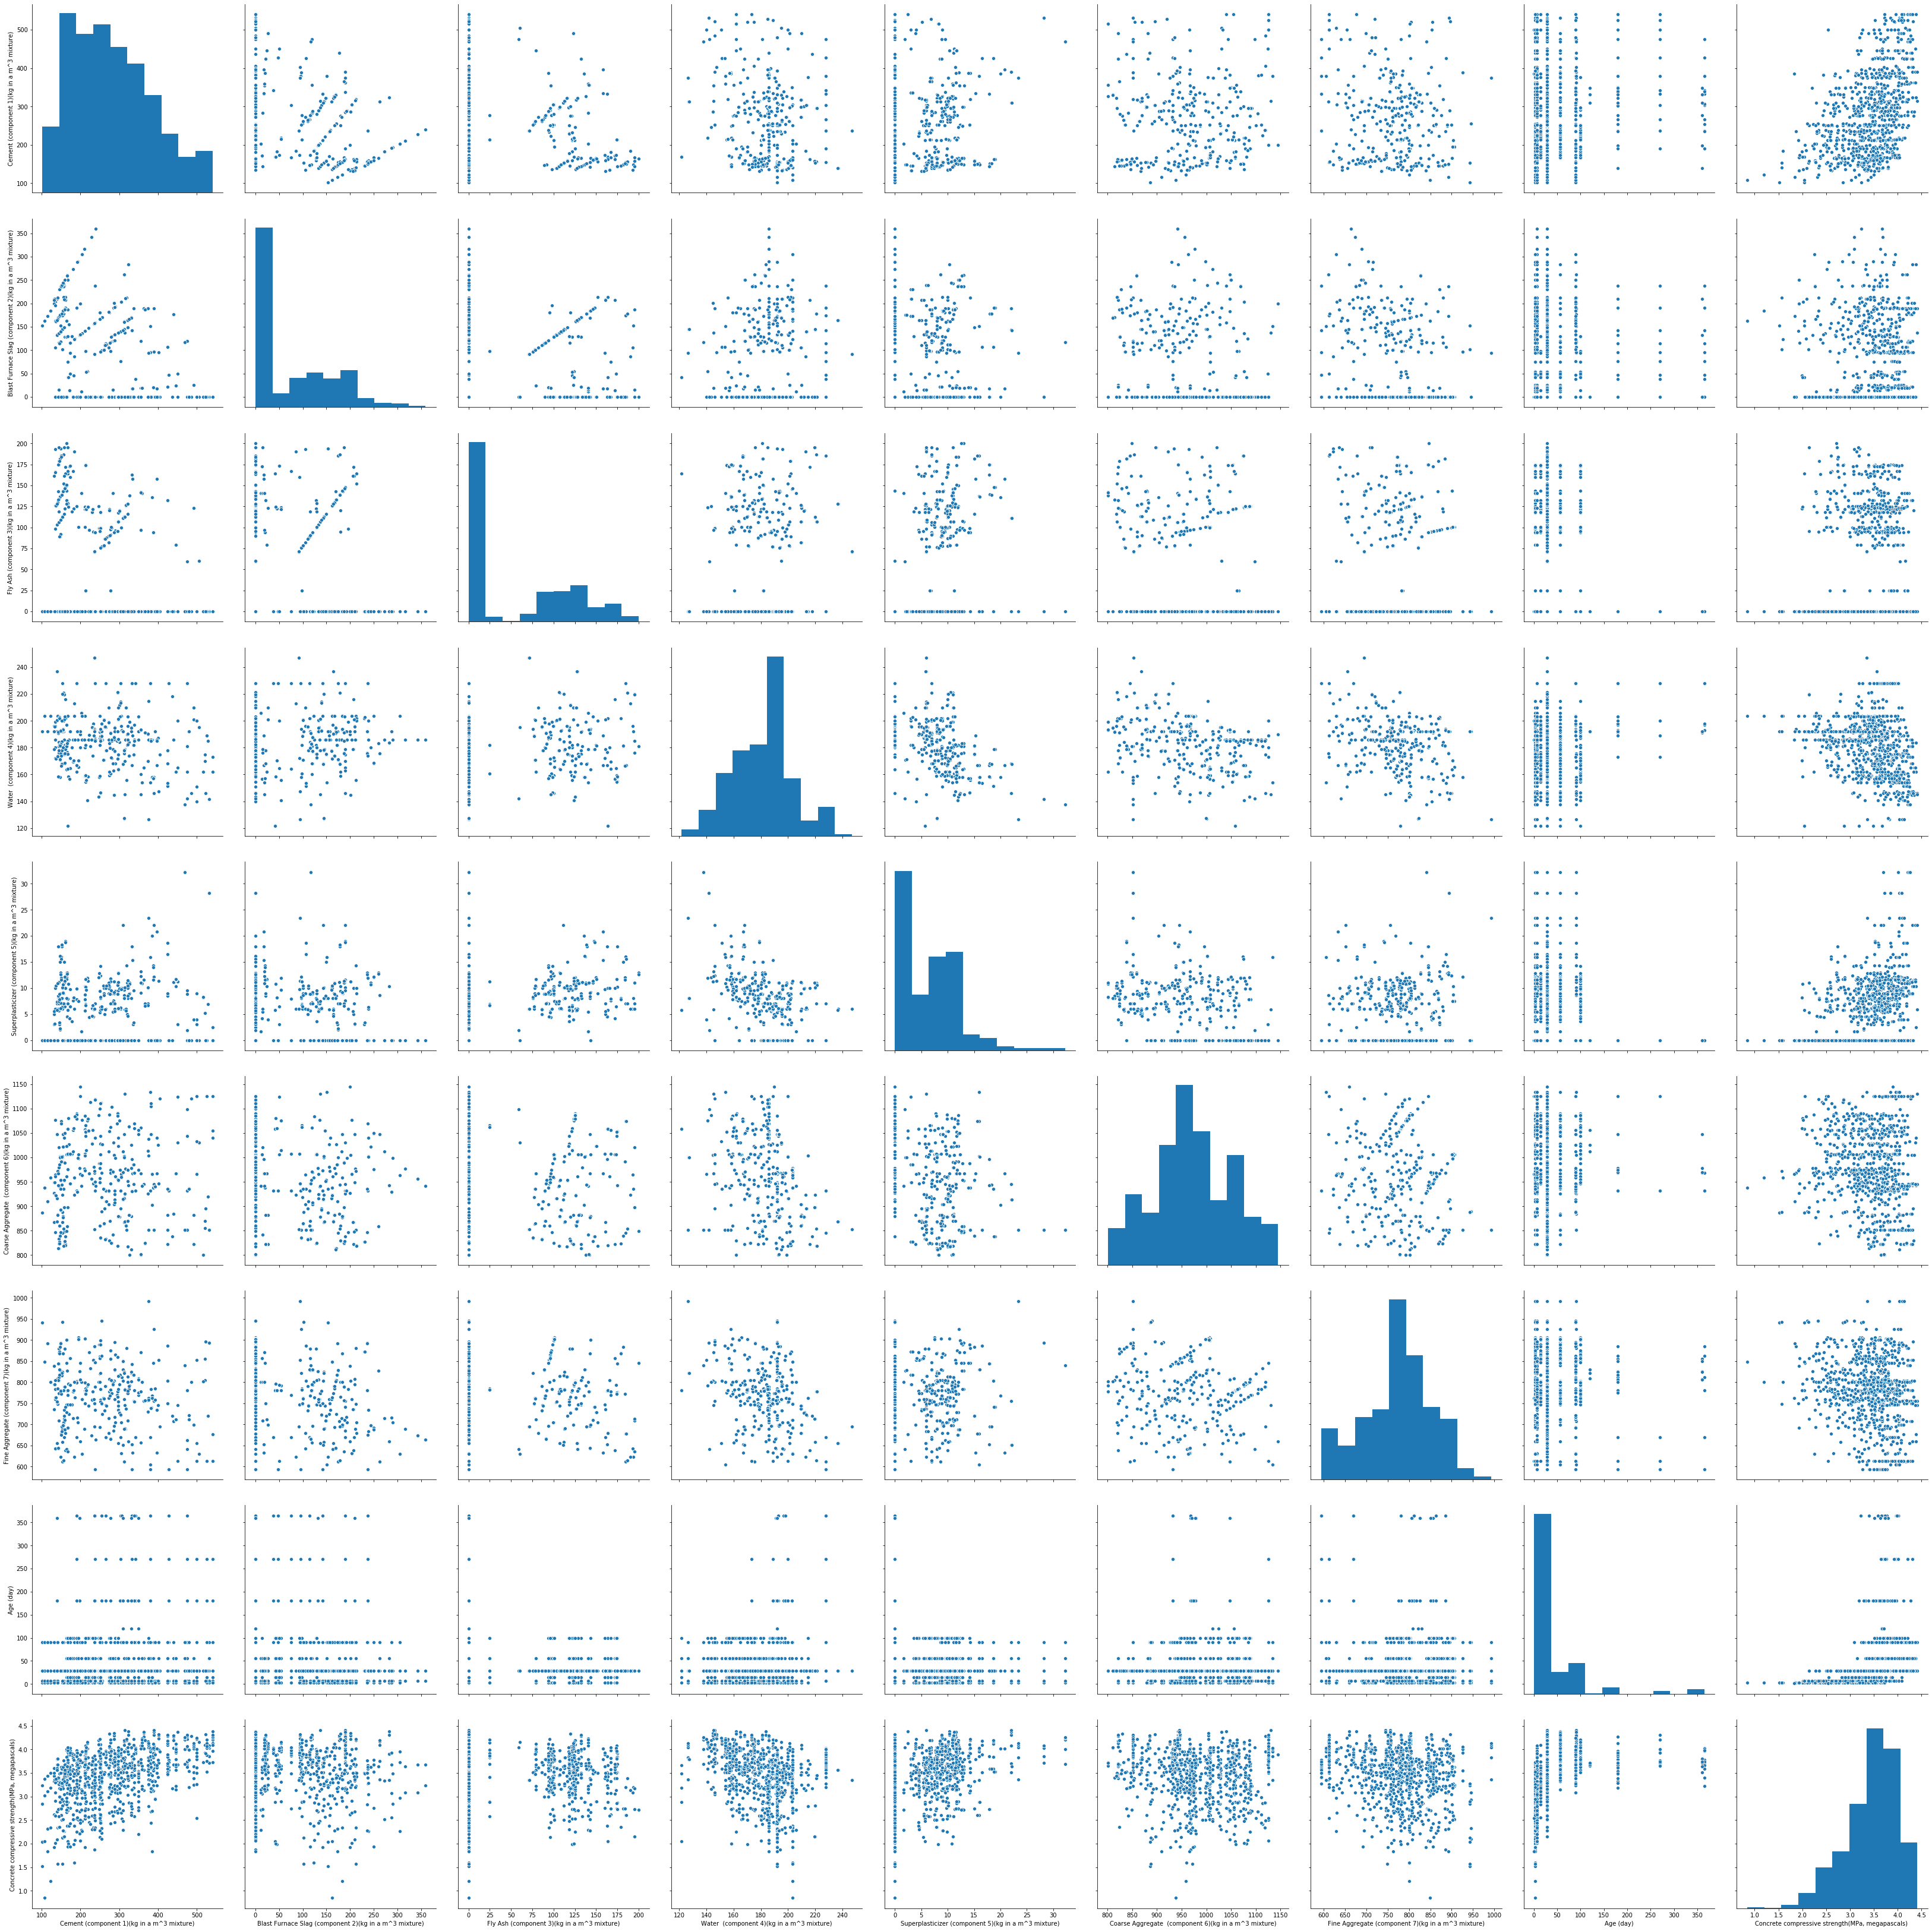

In [19]:
sns.pairplot(data ,  height=10 , size = 5 , markers="o" ) 

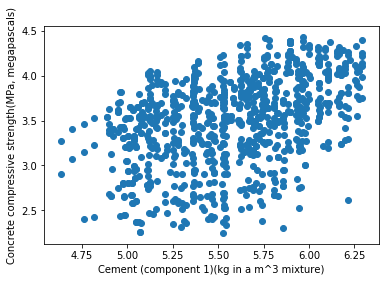

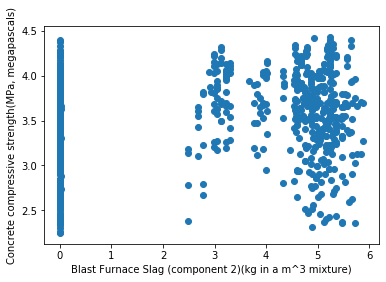

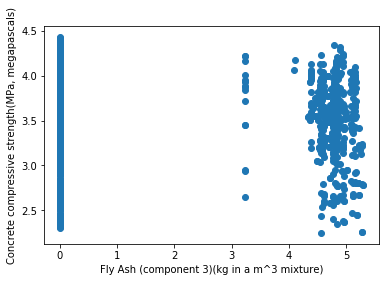

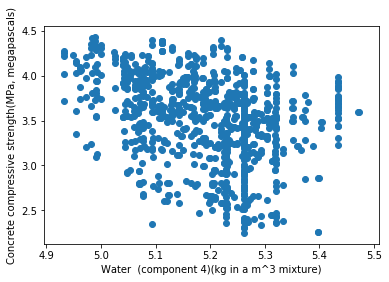

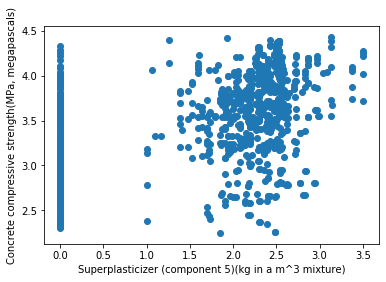

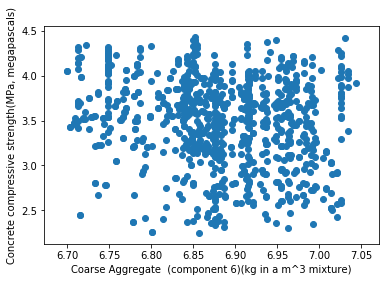

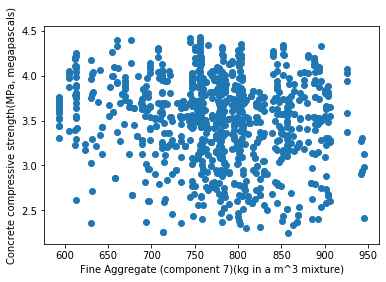

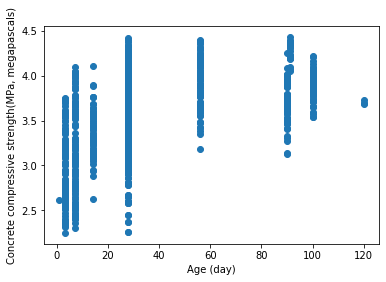

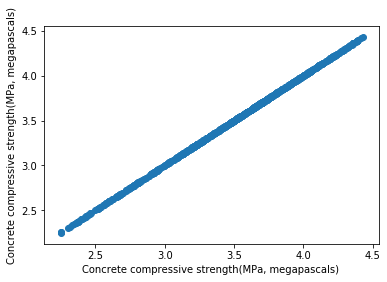

In [20]:
for feature in dataset.columns:

    plt.scatter(dataset[feature],dataset.iloc[:, -1 ])
    plt.xlabel(feature)
    plt.ylabel('Concrete compressive strength(MPa, megapascals)')
    plt.show()

In [21]:
X = dataset.iloc[: , : -1]

y = dataset.iloc[ : , -1]

## Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### splitting the data into train and test

In [23]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # for calculating mean_squared error
from sklearn.metrics import r2_score # for measering the goodness of best fit line
reg = LinearRegression()
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)
score=r2_score(y_test,y_pred)
print(f"value of R^2 is {score}")
Adjusted_score = 1 -    (1-score) * (len(y_train)-1)   /    (len(y_train) - len(dataset.columns) - 1)
print(f"value of adjusted R^2 is {Adjusted_score}")

value of R^2 is 0.6900868801868427
value of adjusted R^2 is 0.6862764729760252


In [25]:
print('RMSE for Linear Regression < =',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE for Linear Regression < = 0.25111354959701476


## Random Forest

RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [26]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
score_rf=r2_score(y_test,y_pred_rf)
print(f"value of R^2 is {score_rf}")
Adjusted_score = 1 -    (1-score_rf) * (len(y_train)-1)   /    (len(y_train) - len(dataset.columns) - 1)
print(f"value of adjusted R^2 is {Adjusted_score}")

value of R^2 is 0.8778894330302432
value of adjusted R^2 is 0.8763880736002873


In [27]:
print('RMSE for Linear Regression < =',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE for Linear Regression < = 0.15762561349137386


## Xgboost

In [28]:
import xgboost
best_xgb_model = xgboost.XGBRegressor()
best_xgb_model.fit(X_train,y_train)
y_pred_xg = best_xgb_model.predict(X_test)
score_xg=r2_score(y_test,y_pred_xg)
print(f"value of R^2 is {score_xg}")
Adjusted_score = 1 -    (1-score_xg) * (len(y_train)-1)   /    (len(y_train) - len(dataset.columns) - 1)
print(f"value of adjusted R^2 is {Adjusted_score}")

value of R^2 is 0.9189609274588655
value of adjusted R^2 is 0.9179645454194253


## Cross validation without hyperparameter tunning

In [29]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = best_xgb_model , X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of Xgboost model = ", cross_validation)
print("\nCross validation mean accuracy of Xgboost model = ", cross_validation.mean())

Cross validation accuracy of Xgboost model =  [0.92707396 0.92603858 0.93085667 0.90906839 0.90274549 0.90351599
 0.95438619 0.90817338 0.92093632 0.92014926]

Cross validation mean accuracy of Xgboost model =  0.920294422028199


## Xgboost with Hyperparameter tuning

In [30]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [31]:
#for tuning parameters
parameters_for_testing = {
   'colsample_bytree':[0.4,0.6,0.8],
   'gamma':[0,0.03,0.1,0.3],
   'min_child_weight':[1.5,6,10],
   'learning_rate':[0.1,0.07],
   'max_depth':[3,5],
   'n_estimators':[10000],
   'reg_alpha':[1e-5, 1e-2,  0.75],
   'reg_lambda':[1e-5, 1e-2, 0.45],
   'subsample':[0.6,0.95]  
}

In [32]:
Xgboost_search = RandomizedSearchCV (best_xgb_model,param_distributions=parameters_for_testing,n_iter=5,cv=5 , random_state = 51)

In [33]:
Xgboost_search.fit(X_train , y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=4,
                                          num_par...
                                          scale_pos_weight=1, subsample=1,
                                          tree_method='exact',
         

In [34]:
print (Xgboost_search.best_estimator_)
print('best params')
print (Xgboost_search.best_params_)
print('best score')
print (Xgboost_search.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0.75, reg_lambda=0.01, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)
best params
{'subsample': 0.6, 'reg_lambda': 0.01, 'reg_alpha': 0.75, 'n_estimators': 10000, 'min_child_weight': 6, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
best score
0.9250918868611292


In [35]:
best_xgb_model_hyper = xgboost.XGBRegressor(subsample= 0.95,
                                            reg_lambda= 0.45, 
                                            reg_alpha= 1e-05, 
                                            n_estimators= 10000, 
                                            min_child_weight= 1.5,
                                            max_depth= 3,
                                            learning_rate= 0.1,
                                            gamma= 0.0, 
                                            colsample_bytree= 0.8)
best_xgb_model_hyper.fit(X_train,y_train)
y_pred_xg_hyper = best_xgb_model_hyper.predict(X_test)
score_xg_hyper=r2_score(y_test,y_pred_xg_hyper)                                                                                  

In [36]:
print(f"value of R^2 is {score_xg_hyper}")
Adjusted_score = 1 -    (1-score_xg_hyper) * (len(y_train)-1)   /    (len(y_train) - len(dataset.columns) - 1)
print(f"value of adjusted R^2 is {Adjusted_score}")

value of R^2 is 0.9196507283985371
value of adjusted R^2 is 0.9186628275181913


## Cross validation with hyperparameter tunning

In [37]:
cross_validation = cross_val_score(estimator = best_xgb_model_hyper, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of Xgboost model = ", cross_validation)
print("\nCross validation mean accuracy of Xgboost model = ", cross_validation.mean())

Cross validation accuracy of Xgboost model =  [0.9385485  0.92297998 0.91673424 0.93044155 0.90902487 0.91683657
 0.94847904 0.89458748 0.92371266 0.92271268]

Cross validation mean accuracy of Xgboost model =  0.922405756973952
